In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import textwrap
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import train_test_split
np.random.seed(0)

In [66]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\developer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [67]:
stops = set(stopwords.words("english"));

In [68]:
stops = stops.union({"said", "would", "could", "told", "also", "one", "two", "mr", "new", "year"})

In [69]:
df = pd.read_csv("bbc_text_cls.csv")

In [70]:
df.head()

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


In [71]:
vectorizer = CountVectorizer(stop_words=stops)

In [72]:
X = vectorizer.fit_transform(df["text"])

In [73]:
Xtrain, Xtest = train_test_split(X, test_size=0.33)

In [74]:
lda = LatentDirichletAllocation(n_components=10, random_state=0)

In [75]:
lda.fit(Xtrain)

LatentDirichletAllocation(random_state=0)

In [76]:
def plot_top_words(model, feature_names, n_top_words=10):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words-1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]
        
        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx + 1}", fontdict={"fontsize":30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle("LDA", fontsize=40)

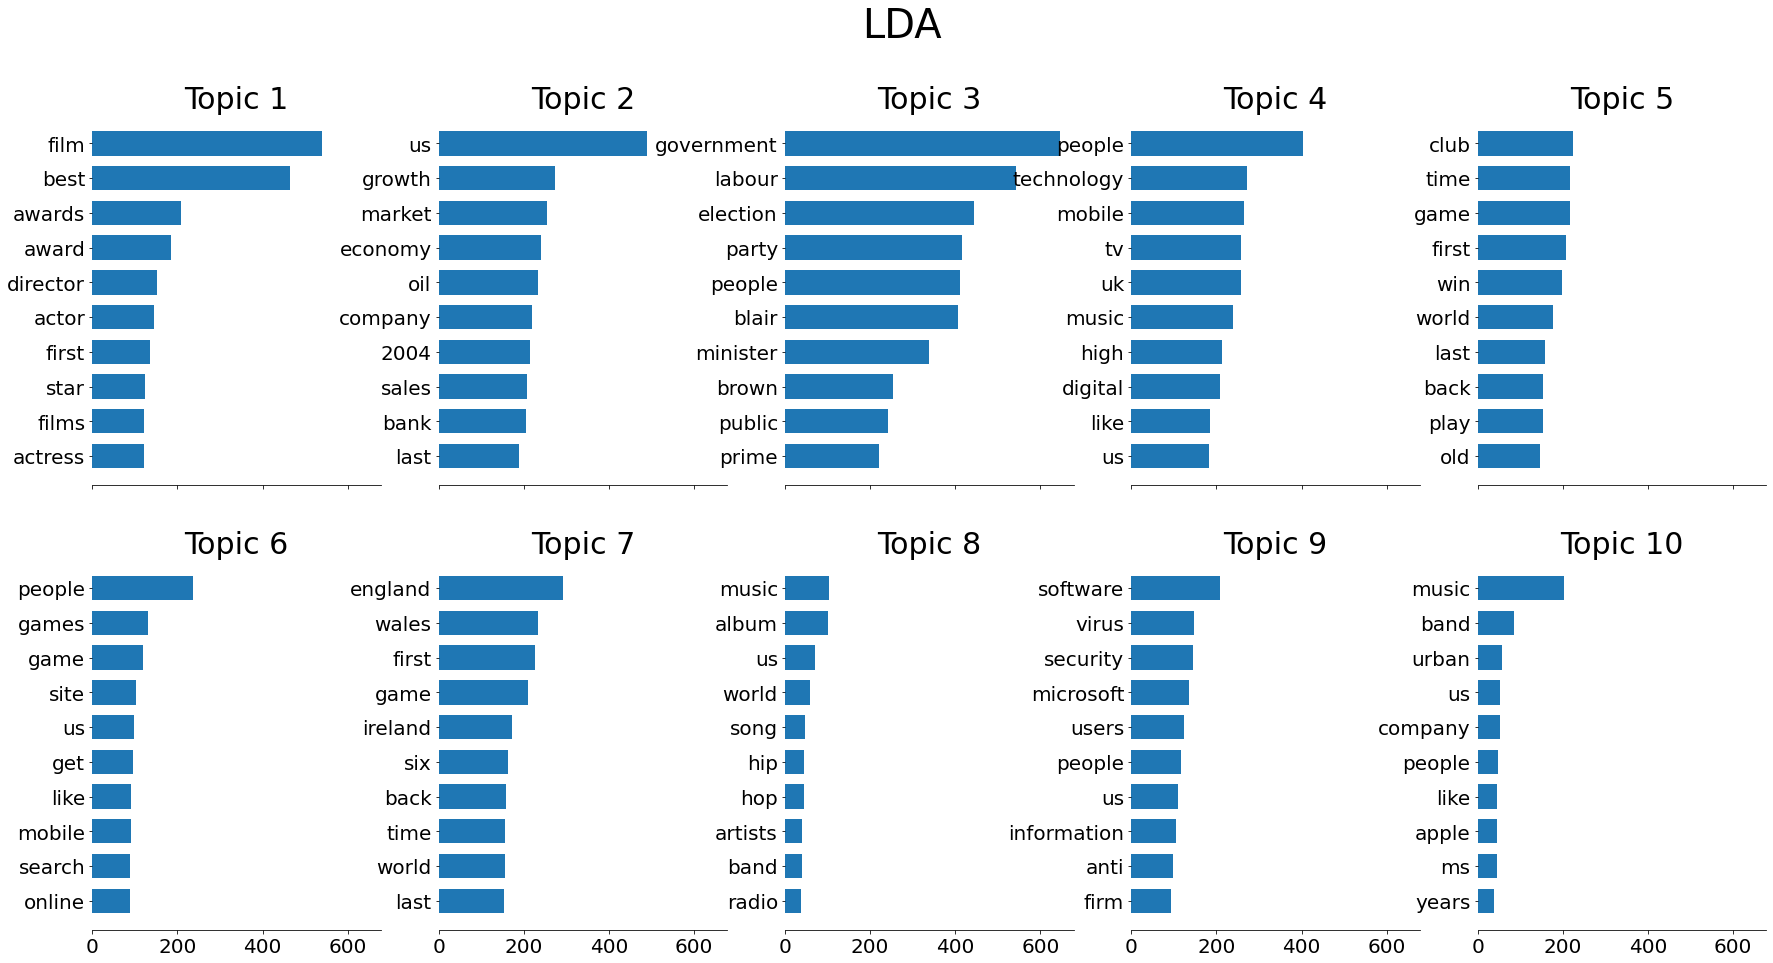

In [77]:
feature_names = vectorizer.get_feature_names_out() # index-to-word mapping
plot_top_words(lda, feature_names)

In [78]:
feature_names

array(['00', '000', '0001', ..., 'zutons', 'zvonareva', 'zvyagintsev'],
      dtype=object)

In [79]:
Z = lda.transform(Xtest)

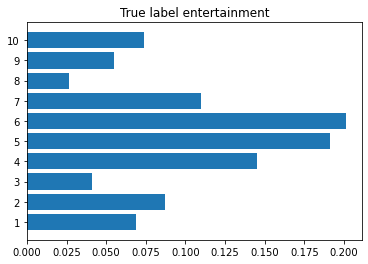

In [80]:
i = np.random.choice(Xtest.shape[0])
z = Z[i]
topics = np.arange(10) + 1

fig, ax = plt.subplots()
ax.barh(topics, z)
ax.set_yticks(topics)
ax.set_title(f"True label {df.iloc[i]['labels']}");

In [81]:
def wrap(text):
    return textwrap.fill(text, replace_whitespace=False, fix_sentence_endings=True)
print(wrap(df.iloc[i]["text"]))

Dirty Den's demise seen by 14m

More than 14 million people saw
"Dirty" Den Watts killed off on Friday, marking EastEnders' 20th
anniversary, according to unofficial figures.

Den's death came 16
years after he was supposedly shot in 1989. But he came back to the
show in September 2003. The audience for BBC One's one-hour special
averaged 13.7 million and peaked at 14.2 million in the last 15
minutes, overnight figures showed.  Den died after being confronted by
Zoe, Chrissie and Sam in the Queen Vic.

If the ratings are confirmed,
the episode will have given the soap its highest audience for a year.
The overnight figures showed almost 60% of the viewing public tuned
into EastEnders between 2000 and 2100 GMT, leaving ITV1 with about
13%. "We are very pleased with the figures," a BBC spokesman said.
"It shows viewers have really enjoyed the story of Den's demise."  The
show's highest audience came at Christmas 1986, when more than 30
million tuned in to see Den, played by Leslie Grantha

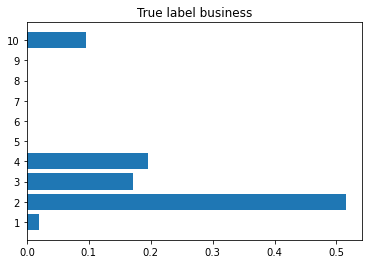

In [82]:
i = np.random.choice(Xtest.shape[0])
z = Z[i]

fig, ax = plt.subplots()
ax.barh(topics, z)
ax.set_yticks(topics)
ax.set_title(f"True label {df.iloc[i]['labels']}");

In [83]:
print(wrap(df.iloc[i]["text"]))

US Airways staff agree to pay cut

A union representing 5,200 flight
attendants at bankrupt US Airways have agreed to a new contract that
cuts pay by nearly 10%.

The deal will help the carrier, trying to
survive by cutting costs by nearly $1bn (£530m) a year, save about
$94m.  More than two thirds of its 28,000 staff have now accepted wage
cuts.  But talks are still continuing with a union representing
mechanics, baggage handlers and cleaners, which has so far failed to
negotiate a new contract.  The seventh largest carrier in the US
sought bankruptcy protection for a second time in two years last
September.  It had been one of the quickest to deal with difficulties
faced by the aviation industry after the 9/11 attacks in 2001. But it
emerged from Chapter 11 bankruptcy in March 2003 to face competition
from low-cost carriers and higher fuel costs.  US Airways management
has said it may need to start liquidating assets if it does not
receive concessions from all staff by the middle of 